In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0     100.719362
1     404.450163
2     589.503321
3     164.113145
4     326.308991
5     553.764731
6     269.803833
7     141.812656
8      58.946199
9     546.683427
10    363.690756
11    144.732412
12     23.994623
13    326.517501
14    356.525680
15    710.377754
16    229.515776
17    778.656456
18    315.694662
19    874.433078
20    241.016212
21    594.078253
Name: NEW_3_1, dtype: float64


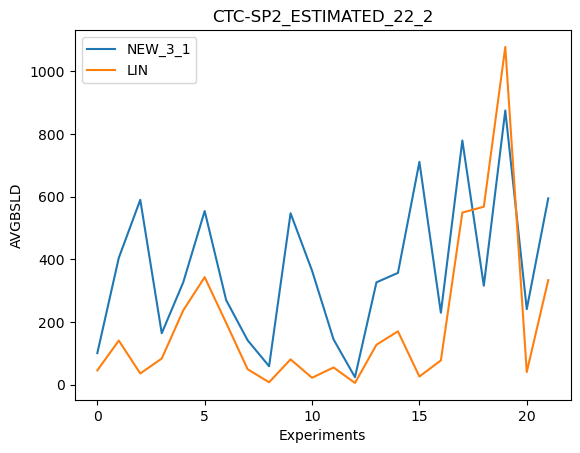

In [30]:
df = pd.read_csv('CTC-SP2_ESTIMATED_22_2.csv')
plt.plot(df.iloc[:,1],label="NEW_3_1")
plt.plot(df.iloc[:,0],label="LIN")

plt.title("CTC-SP2_ESTIMATED_22_2")
plt.xlabel("Experiments")
plt.ylabel("AVGBSLD")
plt.legend()
plt.savefig("../../images/New_3_1VSLin.pdf")
plt.savefig("../../images/New_3_1VSLin.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


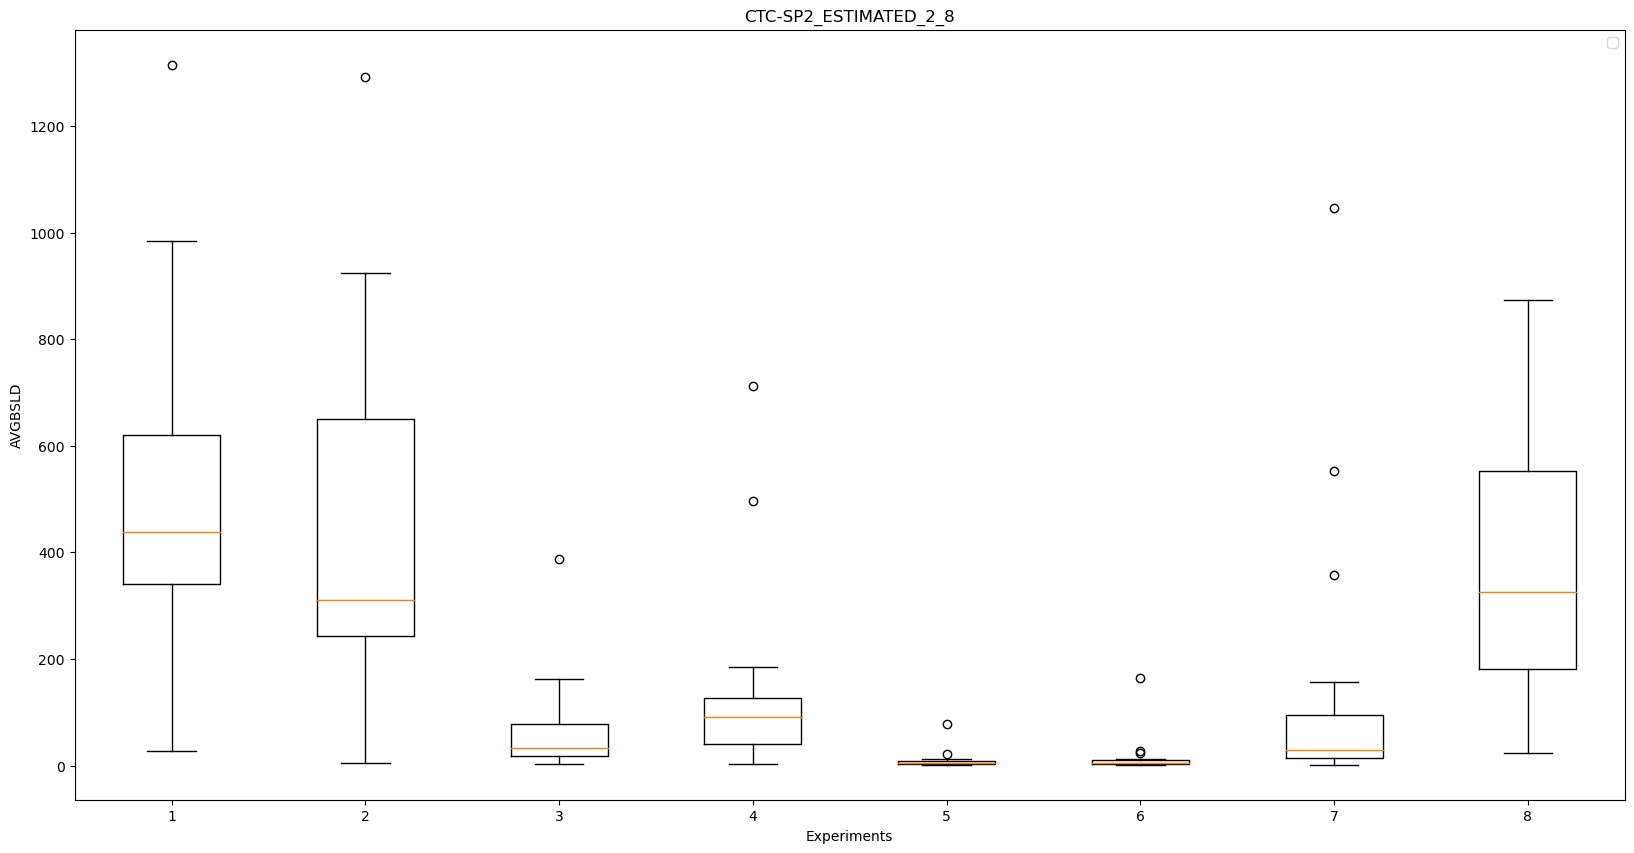

In [4]:
df = pd.read_csv('CTC-SP2_ACTUAL_22_8.csv')
plt.figure(figsize = (20, 10))
plt.boxplot(df)
plt.title("CTC-SP2_ESTIMATED_2_8")
plt.xlabel("Experiments")
plt.ylabel("AVGBSLD")
plt.legend()
plt.savefig("../../images/Comparaision_policies.pdf")
plt.savefig("../../images/Comparaison_policies.png")

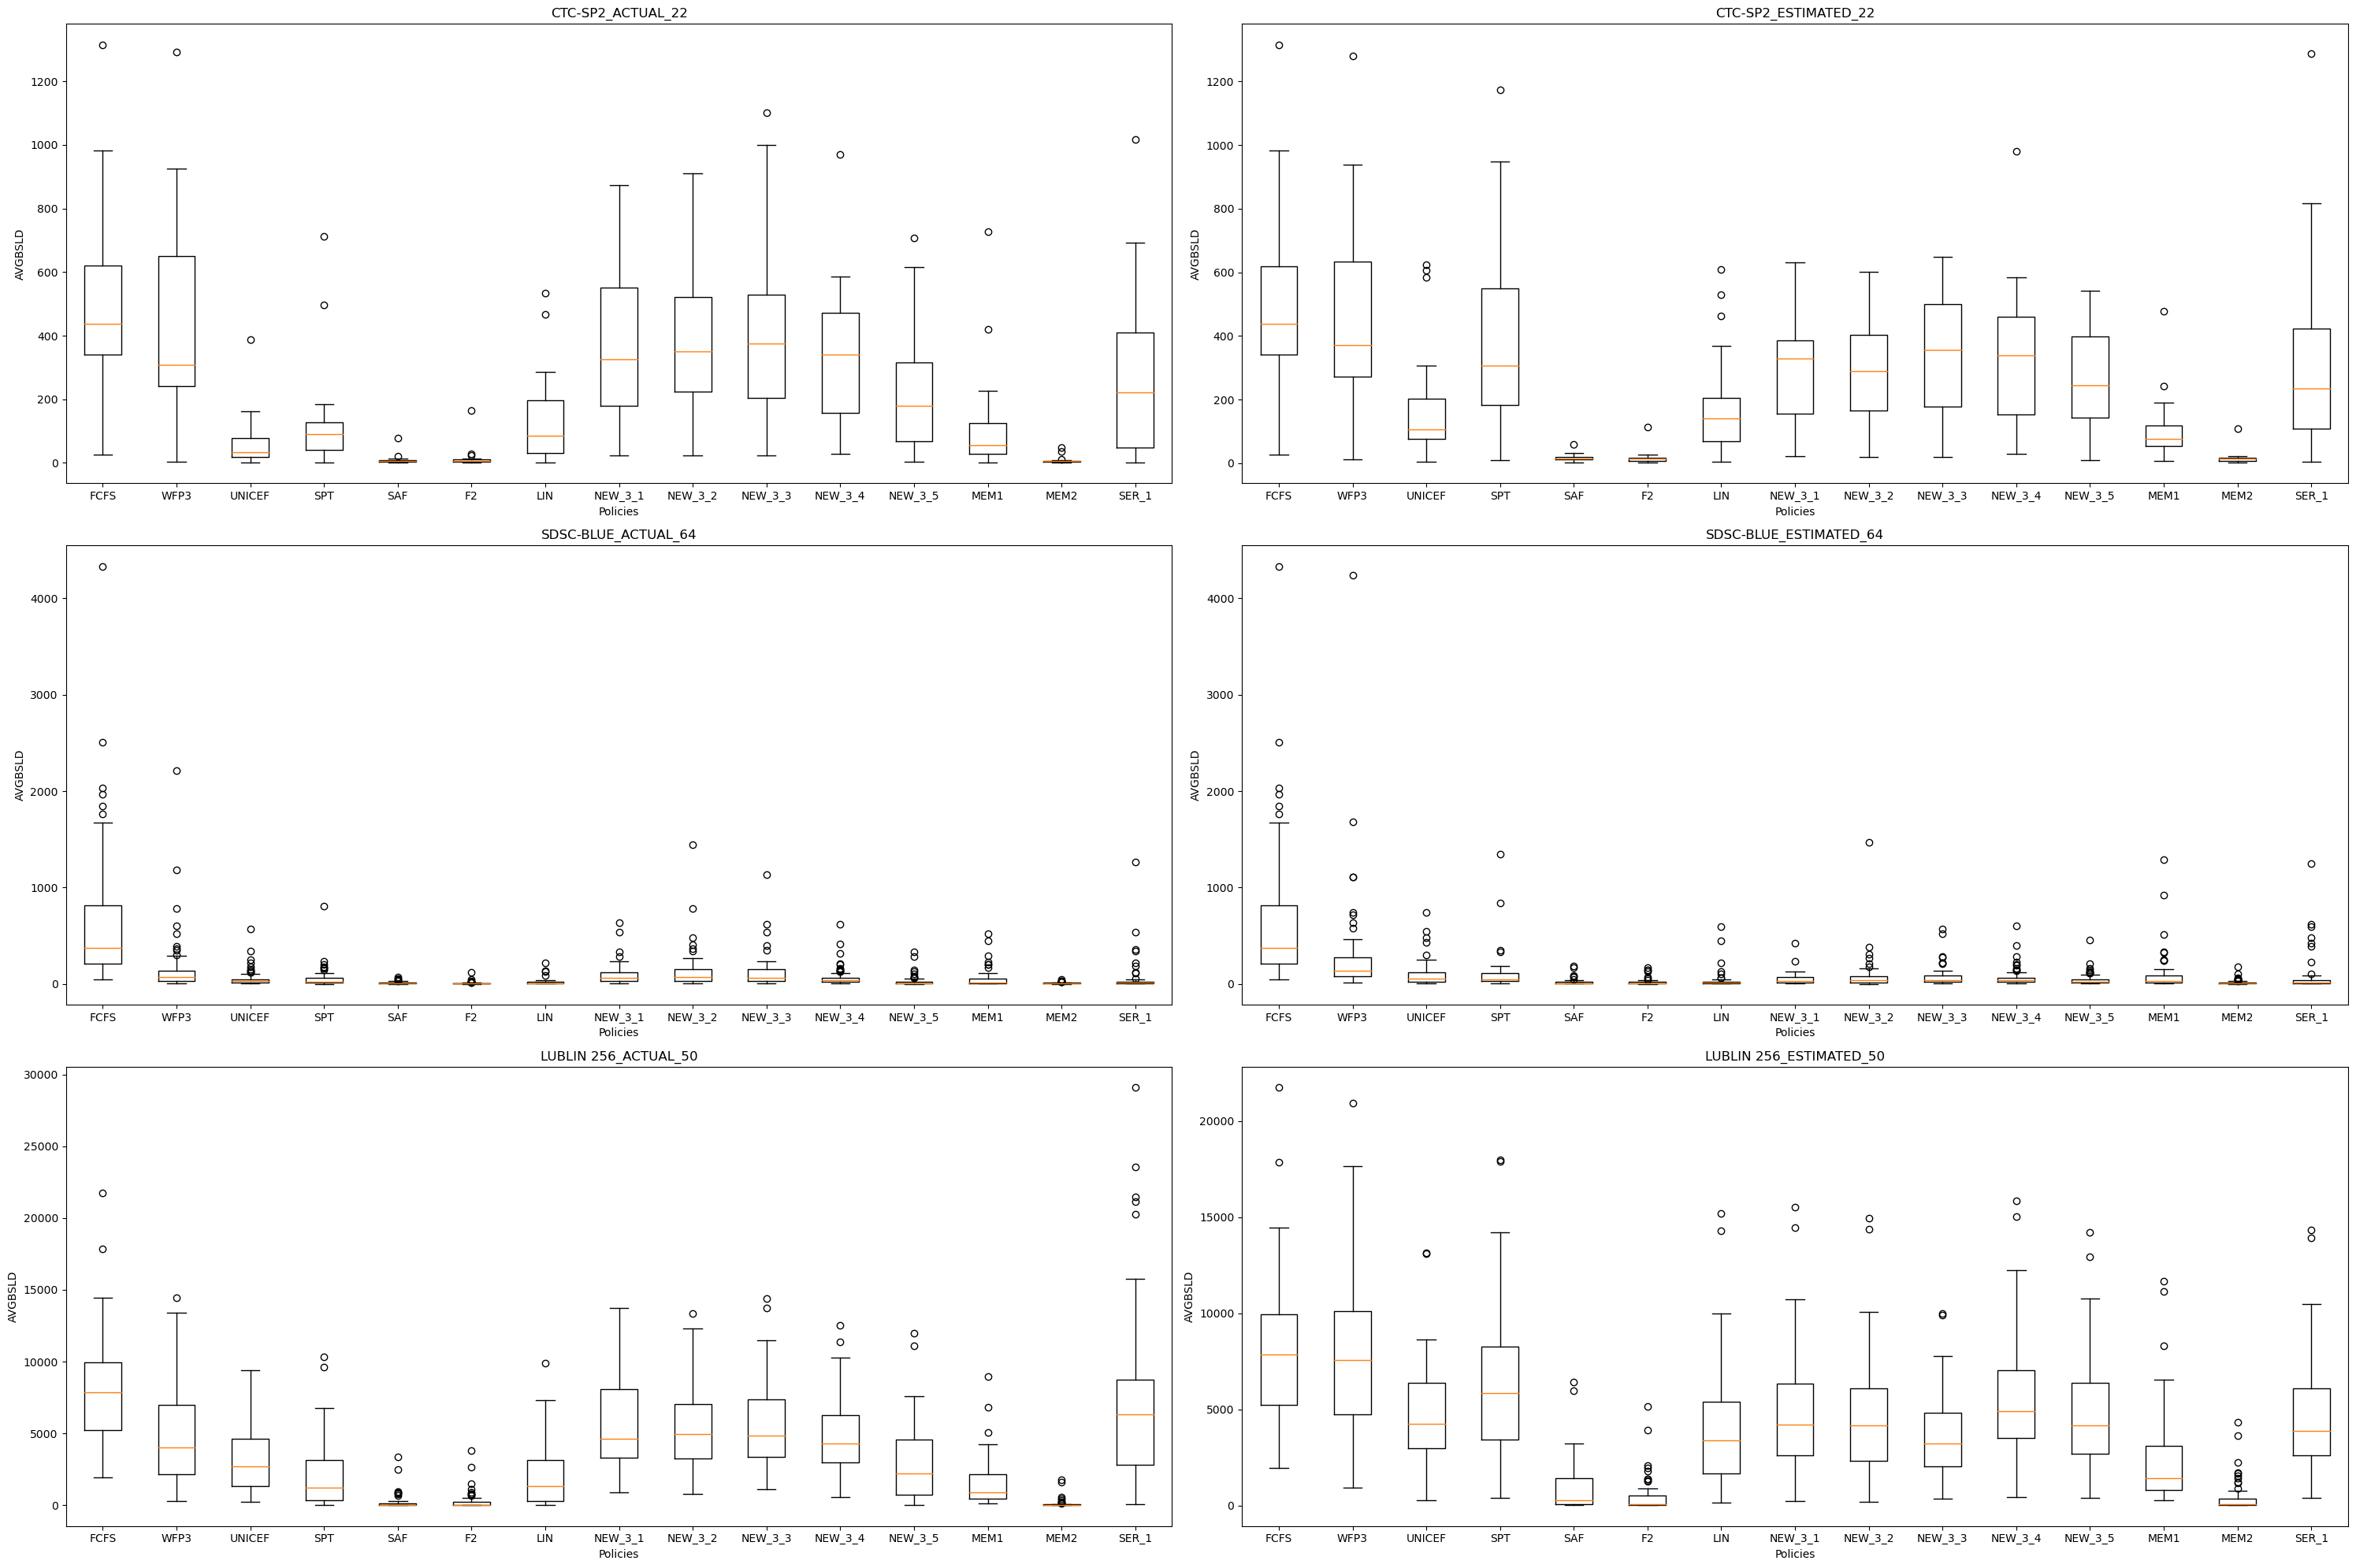

In [17]:
df=[]

# Lire le fichier CSV
df.append(pd.read_csv('CTC-SP2_ACTUAL_22_15.csv'))
df.append(pd.read_csv('CTC-SP2_ESTIMATED_22_15.csv'))
df.append(pd.read_csv('SDSC-BLUE_ACTUAL_64_15.csv'))
df.append(pd.read_csv('SDSC-BLUE_ESTIMATED_64_15.csv'))
df.append(pd.read_csv('LUBLIN 256_ACTUAL_50_15.csv'))
df.append(pd.read_csv('LUBLIN 256_ESTIMATED_50_15.csv'))
title= ['CTC-SP2_ACTUAL_22','CTC-SP2_ESTIMATED_22','SDSC-BLUE_ACTUAL_64','SDSC-BLUE_ESTIMATED_64','LUBLIN 256_ACTUAL_50','LUBLIN 256_ESTIMATED_50']
names=["FCFS","WFP3","UNICEF","SPT","SAF","F2","LIN","NEW_3_1","NEW_3_2","NEW_3_3","NEW_3_4","NEW_3_5","MEM1","MEM2","SER_1"]
# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))
i=0
# Boucle sur chaque subplot
for ax in axes.flatten():
    ax.boxplot(df[i],labels=names)
    ax.set_title(title[i])
    ax.set_xlabel("Policies")
    ax.set_ylabel("AVGBSLD")
    i=i+1

# Ajuster les espaces entre les subplots
plt.tight_layout()

# Sauvegarder la figure dans les deux formats
plt.savefig("../../images/Final_Tester_analysis_SER.pdf")
plt.savefig("../../images/Final_Tester_analysis_SER.png")
# Afficher la figure
plt.show()

Text(0, 0.5, 'AVGBSLD')

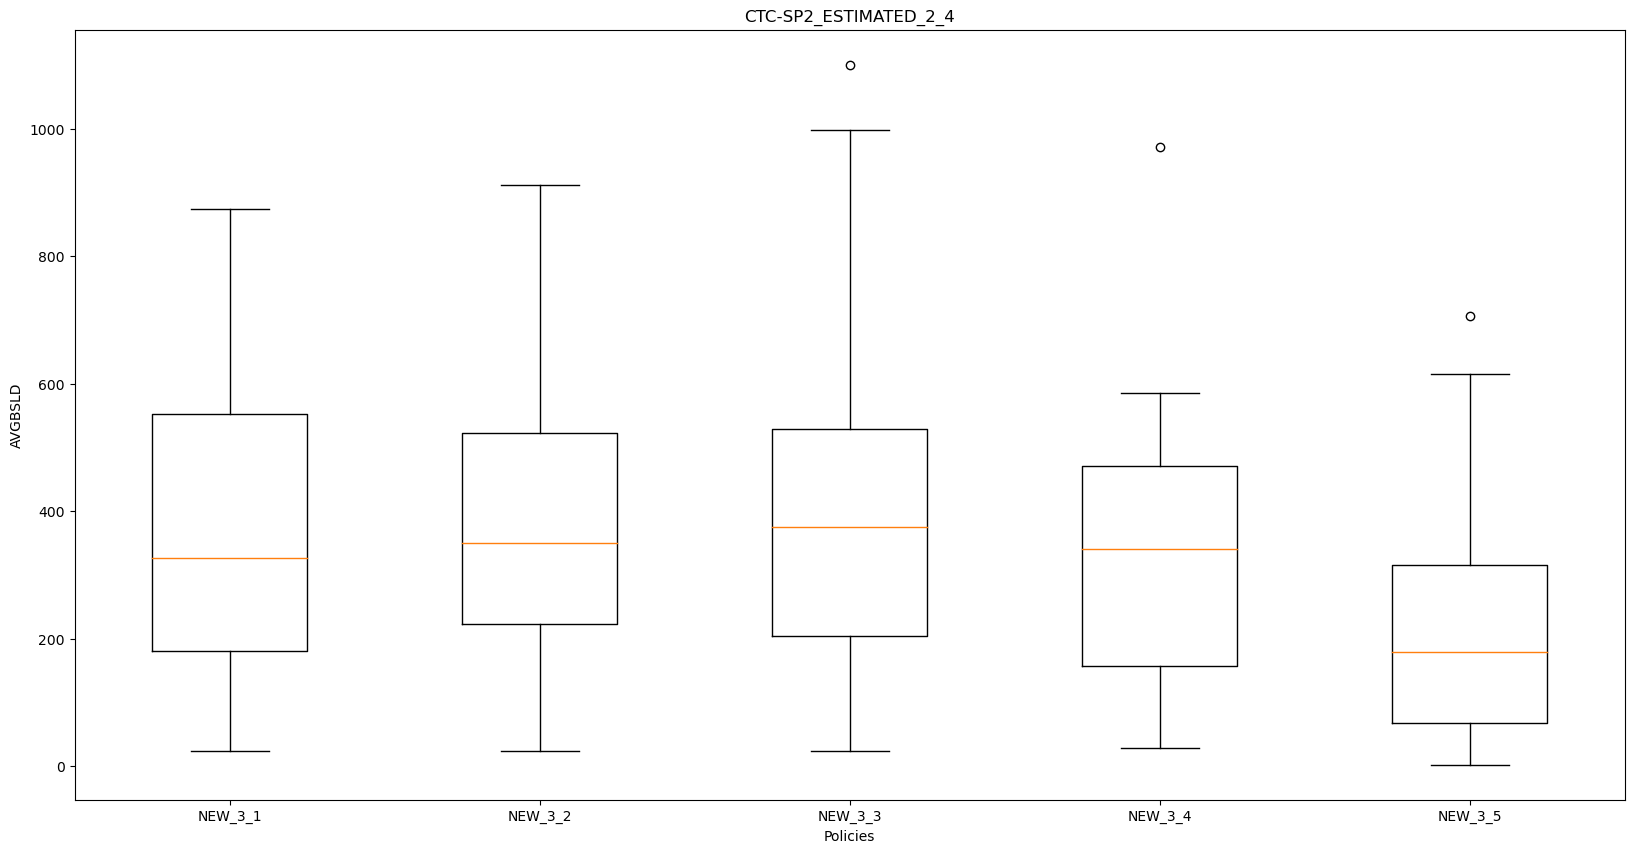

In [11]:
df = pd.read_csv('CTC-SP2_ACTUAL_22_5.csv')
plt.figure(figsize = (20, 10))
plt.boxplot(df,labels=["NEW_3_1","NEW_3_2","NEW_3_3","NEW_3_4","NEW_3_5"])



plt.title("CTC-SP2_ESTIMATED_2_4")
plt.xlabel("Policies")
plt.ylabel("AVGBSLD")



In [ ]:
fig, axes = plt.subplots(3 , 2, figsize=(10, 13))

# Boucle pour charger et traiter les données pour chaque fichier CSV
for i in range(1, 11):
    # Charger les données à partir du fichier CSV pour le premier ensemble
    filename_DS = f"save_data/data_DS/tuple_{i}.csv"
    df_DS = pd.read_csv(filename_DS, header=None)

    # Calculer la somme cumulée du temps pour le premier ensemble
    df_DS[0] = df_DS[0].cumsum()
    data_DS = []
    x = []
    min_score = float('inf')

    # Parcourir les données pour chaque tuple
    for j in range(df.shape[0]):
        if df_DS[1][j] <= min_score:
            data_DS.append(df_DS[1][j])
            x.append(df_DS[0][j])
            min_score = df_DS[1][j]
    print(len(data_DS))
    # Tracer le score en fonction du temps d'exécution cumulé pour le premier ensemble
    ax = axes[(i - 1) // 2, (i - 1) % 2]
    ax.plot( x,data_DS, label=f"Tuple {i} - RS", linestyle='-')

    # Charger les données à partir du fichier CSV pour le deuxième ensemble
    filename_GA = f"save_data/data_GA/tuple_{i}.csv"
    df_GA = pd.read_csv(filename_GA, header=None)

    # Calculer la somme cumulée du temps pour le deuxième ensemble
    df_GA[0] = df_GA[0].cumsum()

    # Tracer le score en fonction du temps d'exécution cumulé pour le deuxième ensemble
    ax.plot(df_GA[0].to_numpy(), df_GA[1].to_numpy(), label=f"Tuple {i} - GA", linestyle='--')
    ax.set_xlim(0, 350)
    # Ajouter des étiquettes et un titre à chaque sous-graphique
    ax.set_xlabel("Execution time",fontsize=16)
    ax.set_ylabel("AVGBSLD",fontsize=16)
    ax.tick_params(axis='x', labelsize=14)  # taille de la police des graduations de l'axe x
    ax.tick_params(axis='y', labelsize=14)
    ax.set_title(f"Comparison of methods - Tuple {i}",fontsize=16)
  

    # Ajouter une légende à chaque sous-graphique
    ax.legend(fontsize=14)

# Ajuster l'espacement entre les sous-graphiques

plt.tight_layout()

# Enregistrer la figure avec tous les graphiques
plt.savefig("plots/all_subplots_together.pdf")

# Afficher le graphique avec tous les graphiques
plt.show()

In [ ]:
df = pd.read_csv('CTC-SP2_ACTUAL_22_4.csv')
plt.figure(figsize = (20, 10))
plt.plot(df.iloc[:,0],label="FCFS")
plt.plot(df.iloc[:,1],label="WFP3")
plt.plot(df.iloc[:,2],label="UNICEF")
plt.plot(df.iloc[:,3],label="MEM1")
plt.plot(df.iloc[:,4],label="MEM2")
plt.plot(df.iloc[:,5],label="LIN")

plt.title("CTC-SP2_ESTIMATED_2_6")
plt.xlabel("Experiments")
plt.ylabel("AVGBSLD")
plt.legend()
plt.savefig("../../images/Comparaision_policies_MEM1.pdf")
plt.savefig("../../images/Comparaison_policies_MEM1.png")

0     129.621138
1     134.497900
2      65.221194
3     535.709337
4      85.646649
         ...    
59    148.061104
60     20.497106
61    127.436651
62    180.798217
63    282.847858
Name: NEW_3_1, Length: 64, dtype: float64


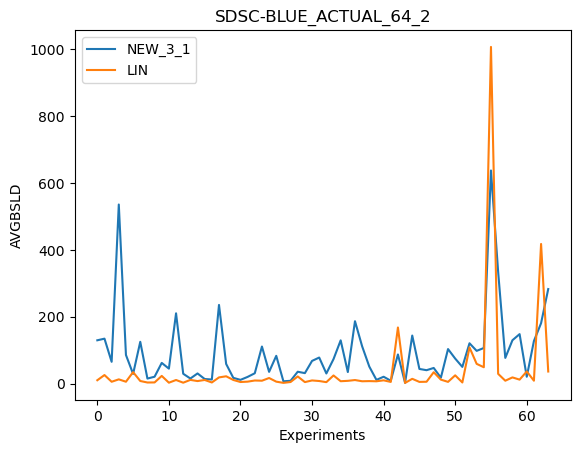

In [29]:
df = pd.read_csv('SDSC-BLUE_ACTUAL_64_2.csv')
plt.plot(df.iloc[:,1],label="NEW_3_1")
plt.plot(df.iloc[:,0],label="LIN")
print(df.iloc[:,1])
plt.title("SDSC-BLUE_ACTUAL_64_2")
plt.xlabel("Experiments")
plt.ylabel("AVGBSLD")
plt.legend()
plt.savefig("../../images/New_3_1VSLinSDSC.pdf")
plt.savefig("../../images/New_3_1VSLinSDSC.png")

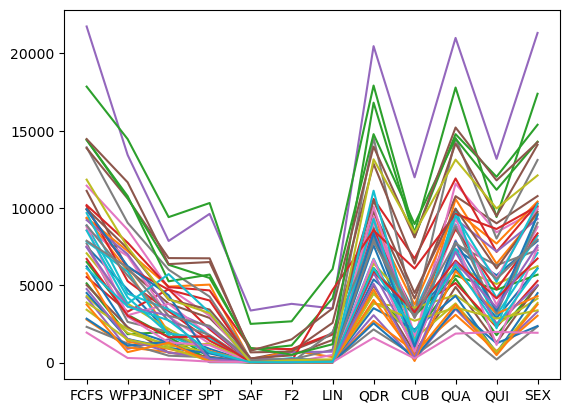

In [16]:
df = pd.read_csv('LUBLIN 256_ACTUAL_50_12.csv')
for i in range(len(df.iloc[:,1])):
    plt.plot(df.iloc[i, :])


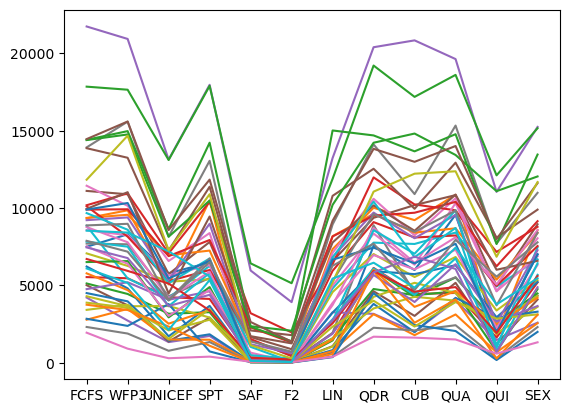

In [17]:
df = pd.read_csv('LUBLIN 256_ESTIMATED_50_12.csv')
for i in range(len(df.iloc[:,1])):
    plt.plot(df.iloc[i, :])
